<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 13. <b>Комбинация методов и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Общее решение</a></li>
        <li><a href="#2">Комбинация деревьев</a></li>
        <li><a href="#3">Комбинация методов</a>
        <li><a href="#4">Источники</a>
        </li>
    </ol>
</div>

<p><b>Подлючение библиотек</b></p>

In [1]:
import time
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import tree

In [5]:
from scipy import stats

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Общее решение</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html">VotingClassifier</a>

In [6]:
from sklearn.ensemble import VotingClassifier

<p>Собственный класс</p>

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

class VotingClassRegress():
    def __init__(self, models, modelType=0):
        self.__models = models
        self.__modelType = modelType
    
    def fit(self, X_train, Y_train):
        [model.fit(X_train, Y_train) for model in self.__models]
    
    def predict(self, X):
        if self.__modelType == 0:
            prs = np.array([model.predict(X) for model in self.__models])
            return np.array([np.argmax(np.bincount(row)) for row in prs.T])
        else: 
            return np.array(np.array([model.predict(X) for model in self.__models]).mean(axis=0))
    
    def score(self, X_test, Y_test):
        prs = self.predict(X_test)
        
        if self.__modelType == 0:
            return accuracy_score(Y_test, prs)
        else:
            return mean_squared_error(Y_test, prs)
        
    def reg_model_score(self, modelIndx, X_test, Y_test):
        prs = self.__models[modelIndx].predict(X_test)
        return mean_squared_error(Y_test, prs)
    
    def predict_model(self, modelIndx, X):
        return self.__models[modelIndx].predict(X)
    
    @property
    def estimators_(self):
        return self.__models

In [8]:
from scipy.stats import mode
mode([2,2,2,3,3,1,1])

ModeResult(mode=array([2]), count=array([3]))

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Комбинация деревьев</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Классификация</b></p>

<p><b>Исходные данные</b></p>

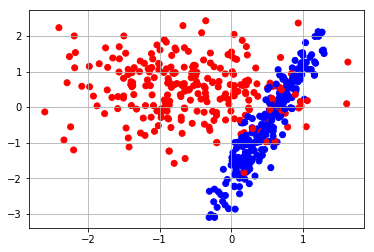

In [9]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.5,
                           random_state=484)

clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1110)

<p><b>Обучение</b></p>

In [11]:
decTree2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=0)
decTree5 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
decTree10 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=0)
decTree15 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=15, random_state=0)

In [12]:
combDecTreesStd = VotingClassifier(estimators=[("dt2", decTree2), ("dt5", decTree5), 
                                     ("dt10", decTree10), ("dt15", decTree15)], voting='hard')

In [13]:
combDecTreesStd.fit(x_train, y_train)

VotingClassifier(estimators=[('dt2', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, rand...split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'))],
         n_jobs=1, voting='hard', weights=None)

In [14]:
combDecTreesStd.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='

In [15]:
combDecTrees = VotingClassRegress([decTree2, decTree5, decTree10, decTree15], modelType=0)

In [16]:
combDecTrees.fit(x_train, y_train)

<p><b>Тестирование</b></p>

In [17]:
print("Test Score using for decTree2:", combDecTreesStd.estimators_[0].score(x_test, y_test))
print("Test Score using for decTree5:", combDecTreesStd.estimators_[1].score(x_test, y_test))
print("Test Score using for decTree10:", combDecTreesStd.estimators_[2].score(x_test, y_test))
print("Test Score using for decTree15:", combDecTreesStd.estimators_[3].score(x_test, y_test))

Test Score using for decTree2: 0.846666666667
Test Score using for decTree5: 0.906666666667
Test Score using for decTree10: 0.913333333333
Test Score using for decTree15: 0.9


In [18]:
score_std = combDecTreesStd.score(x_test, y_test)
score = combDecTrees.score(x_test, y_test)
print("Test Score using VotingClassifier = ", score_std)
print("Test Score using VotingClassRegress = ", score)

Test Score using VotingClassifier =  0.926666666667
Test Score using VotingClassRegress =  0.926666666667


<p><b>Графики</b></p>

In [19]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z = [model.predict(points).reshape(xx.shape) for model in [decTree2, decTree5, decTree10, decTree15, combDecTrees]]

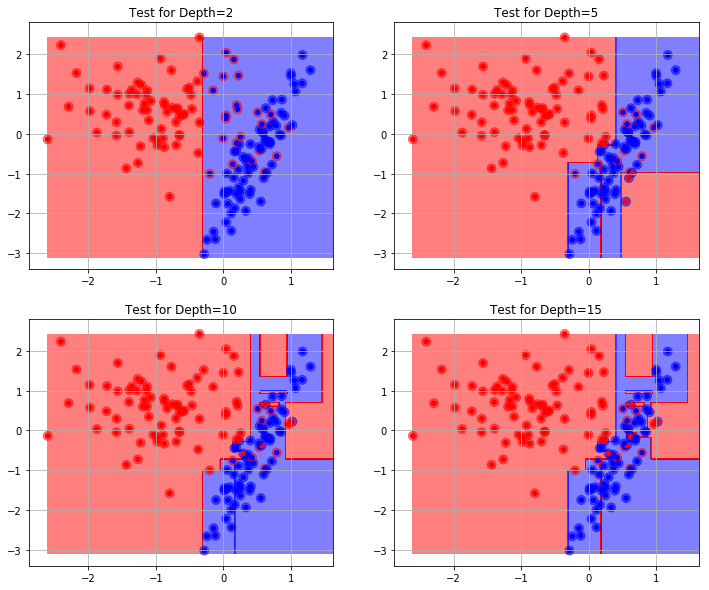

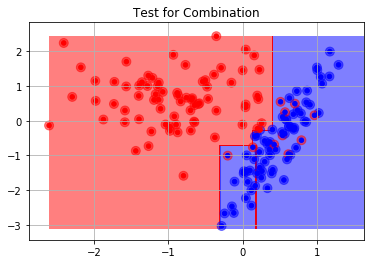

In [20]:
plt.figure(1, figsize=[12, 10])

plt.subplot(2,2,1)
plt.title("Test for Depth=2")
plt.contourf(xx, yy, Z[0], cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=decTree2.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Test for Depth=5")
plt.contourf(xx, yy, Z[1], cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=decTree5.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Test for Depth=10")
plt.contourf(xx, yy, Z[2], cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=decTree10.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(2,2,4)
plt.title("Test for Depth=15")
plt.contourf(xx, yy, Z[3], cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=decTree15.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

plt.title("Test for Combination")
plt.contourf(xx, yy, Z[4], cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=combDecTrees.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Регрессия</b></p>

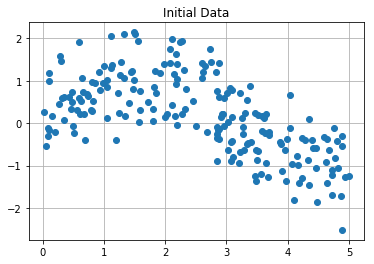

In [22]:
#Исходные данные
n = 200
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.6, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

<p><b>Обучение</b></p>

In [23]:
#Обучение
decTree2 = tree.DecisionTreeRegressor(criterion="mse", max_depth=2, random_state=0)
decTree5 = tree.DecisionTreeRegressor(criterion="mse", max_depth=5, random_state=0)
decTree10 = tree.DecisionTreeRegressor(criterion="mse", max_depth=10, random_state=0)
decTree15 = tree.DecisionTreeRegressor(criterion="mse", max_depth=15, random_state=0)

combRegTree = VotingClassRegress([decTree2, decTree5, decTree10, decTree15], modelType=1)
combRegTree.fit(x_train, y_train)

<p><b>Тестирование</b></p>

In [24]:
#MSE
print("Test Score using for decTree2:", combRegTree.reg_model_score(0, x_test, y_test))
print("Test Score using for decTree5:", combRegTree.reg_model_score(1, x_test, y_test))
print("Test Score using for decTree10:", combRegTree.reg_model_score(2, x_test, y_test))
print("Test Score using for decTree15:", combRegTree.reg_model_score(3, x_test, y_test))

Test Score using for decTree2: 0.491580642541
Test Score using for decTree5: 0.47731779785
Test Score using for decTree10: 0.607447014803
Test Score using for decTree15: 0.66811858635


In [25]:
#R^2
print("Test Score using for decTree2:", combRegTree.estimators_[0].score(x_test, y_test))
print("Test Score using for decTree5:", combRegTree.estimators_[1].score(x_test, y_test))
print("Test Score using for decTree10:", combRegTree.estimators_[2].score(x_test, y_test))
print("Test Score using for decTree15:", combRegTree.estimators_[3].score(x_test, y_test))

Test Score using for decTree2: 0.351326300848
Test Score using for decTree5: 0.370147083086
Test Score using for decTree10: 0.198432834755
Test Score using for decTree15: 0.118372618092


In [26]:
#MSE
score = combRegTree.score(x_test, y_test)
print("Test Score using VotingClassRegress = ", score)

Test Score using VotingClassRegress =  0.476993366817


<p><b>Графики</b></p>

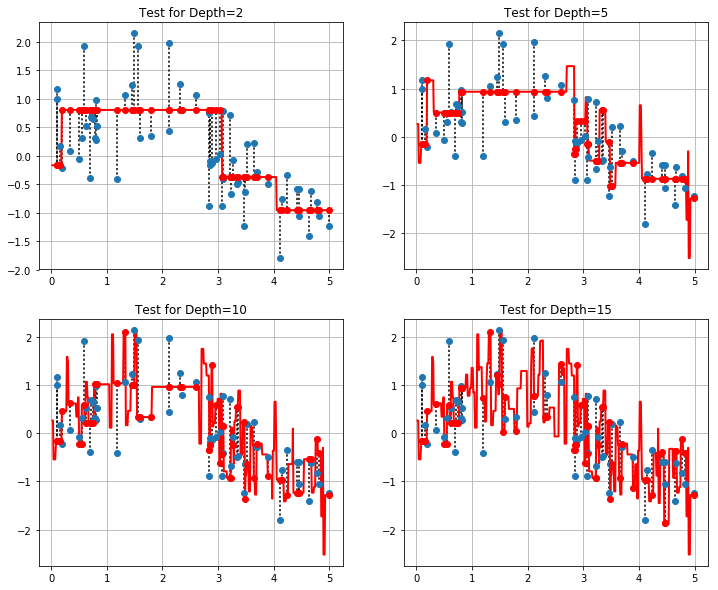

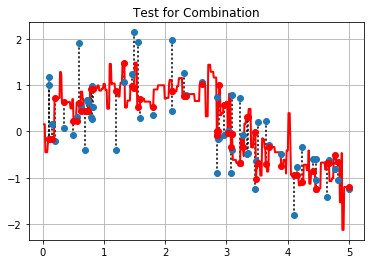

In [27]:
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]

plt.figure(1, figsize=[12, 10])

plt.subplot(2,2,1)
plt.title("Test for Depth=2")
plt.plot(xx, decTree2.predict(xx), c="r", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=decTree2.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, decTree2.predict(x_test), "o", color="red", lw=2)
plt.grid()

plt.subplot(2,2,2)
plt.title("Test for Depth=5")
plt.plot(xx, decTree5.predict(xx), c="r", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=decTree5.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, decTree5.predict(x_test), "o", color="red", lw=2)
plt.grid()

plt.subplot(2,2,3)
plt.title("Test for Depth=10")
plt.plot(xx, decTree10.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=decTree10.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, decTree10.predict(x_test), "o", color="red", lw=2)
plt.grid()

plt.subplot(2,2,4)
plt.title("Test for Depth=15")
plt.plot(xx, decTree15.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=decTree15.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, decTree15.predict(x_test), "o", color="red", lw=2)
plt.grid()

plt.show()

plt.title("Test for Combination")
plt.plot(xx, combRegTree.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=combRegTree.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, combRegTree.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Комбинация методов</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

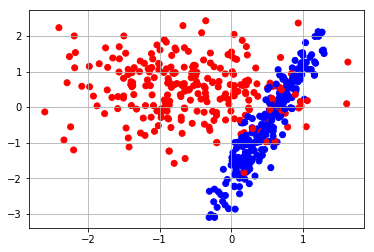

In [29]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.5,
                           random_state=484)

clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [31]:
clfLR = LogisticRegression(penalty="l2", solver="lbfgs", C=10e5, random_state=0, fit_intercept=True)
clfGNB = GaussianNB()
clfRF = RandomForestClassifier(random_state=0)

combStd = VotingClassifier(estimators=[("clfLR", clfLR), ("clfGNB", clfGNB), 
                                     ("clfRF", clfRF)], voting="soft")
combStd.fit(x_train, y_train)

VotingClassifier(estimators=[('clfLR', LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)), ('clfGNB', G...estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))],
         n_jobs=1, voting='soft', weights=None)

In [32]:
print("Test Score using for clfLR:", combStd.estimators_[0].score(x_test, y_test))
print("Test Score using for clfGNB:", combStd.estimators_[1].score(x_test, y_test))
print("Test Score using for clfRF:", combStd.estimators_[2].score(x_test, y_test))

Test Score using for clfLR: 0.94
Test Score using for clfGNB: 0.873333333333
Test Score using for clfRF: 0.94


In [33]:
score_std = combStd.score(x_test, y_test)
print("Test Score using VotingClassifier = ", score_std)

Test Score using VotingClassifier =  0.933333333333


<p><b>Графики</b></p>

In [34]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z = [model.predict(points).reshape(xx.shape) for model in combStd.estimators_]
Z_comb = combStd.predict(points).reshape(xx.shape)

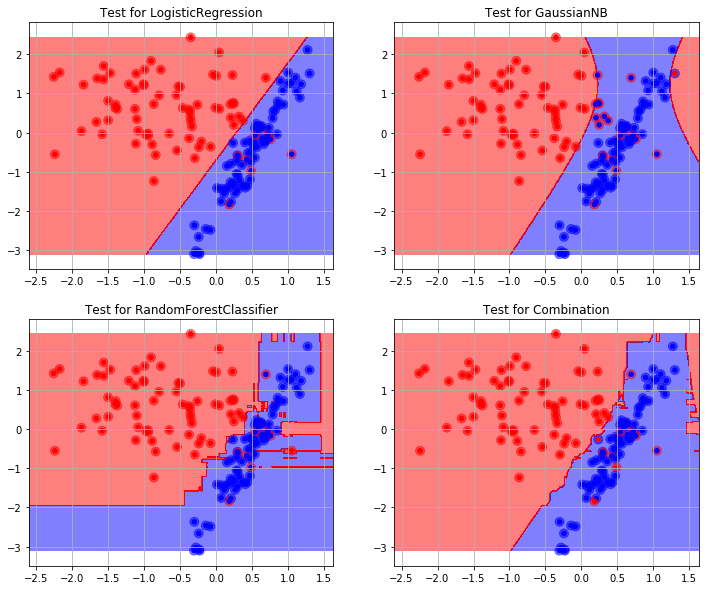

In [35]:
plt.figure(1, figsize=[12, 10])

plt.subplot(2,2,1)
plt.title("Test for LogisticRegression")
plt.contourf(xx, yy, Z[0], cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=combStd.estimators_[0].predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Test for GaussianNB")
plt.contourf(xx, yy, Z[1], cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=combStd.estimators_[1].predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Test for RandomForestClassifier")
plt.contourf(xx, yy, Z[2], cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=combStd.estimators_[2].predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(2,2,4)
plt.title("Test for Combination")
plt.contourf(xx, yy, Z_comb, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=combDecTrees.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Регрессия</b></p>

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

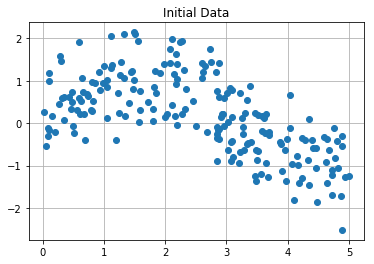

In [37]:
#Исходные данные
n = 200
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.6, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

<p><b>Обучение</b></p>

In [38]:
#Обучение
regLR = LinearRegression()
regRF = RandomForestRegressor(criterion="mse", max_depth=5, random_state=0)

combRegTree = VotingClassRegress([regLR, regRF], modelType=1)
combRegTree.fit(x_train, y_train)

<p><b>Тестирование</b></p>

In [39]:
print("Test Score using for LinearRegression:", combRegTree.reg_model_score(0, x_test, y_test))
print("Test Score using for RandomForestRegressor:", combRegTree.reg_model_score(1, x_test, y_test))

Test Score using for LinearRegression: 0.49383303359
Test Score using for RandomForestRegressor: 0.463088089936


In [40]:
score = combRegTree.score(x_test, y_test)
print("Test Score using VotingClassRegress = ", score)

Test Score using VotingClassRegress =  0.420011557972


<p><b>Графики</b></p>

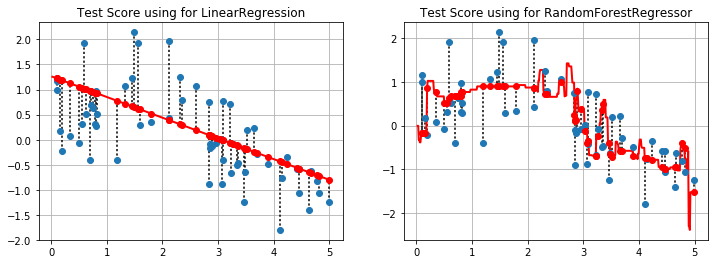

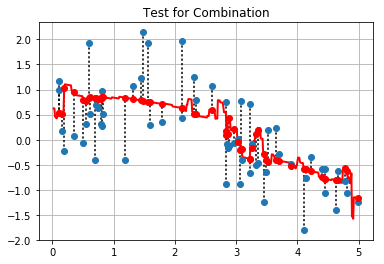

In [41]:
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]

plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Test Score using for LinearRegression")
plt.plot(xx, combRegTree.predict_model(0, xx), c="r", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=combRegTree.predict_model(0, x_test), colors="black", linestyles="dotted")
plt.plot(x_test, combRegTree.predict_model(0, x_test), "o", color="red", lw=2)
plt.grid()

plt.subplot(1,2,2)
plt.title("Test Score using for RandomForestRegressor")
plt.plot(xx, combRegTree.predict_model(1, xx), c="r", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=combRegTree.predict_model(1, x_test), colors="black", linestyles="dotted")
plt.plot(x_test, combRegTree.predict_model(1, x_test), "o", color="red", lw=2)
plt.grid()

plt.show()

plt.title("Test for Combination")
plt.plot(xx, combRegTree.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=combRegTree.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, combRegTree.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()

<p><b>Классификация - AdaBoost</b></p>

In [42]:
from sklearn.ensemble import AdaBoostClassifier

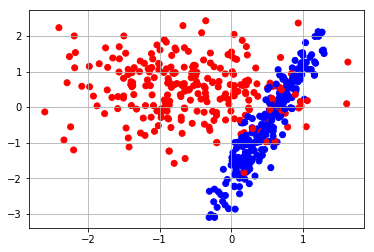

In [43]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.5,
                           random_state=484)

clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [49]:
#clfLR = LogisticRegression(penalty='l2', solver='lbfgs', C=10e-5, random_state=0, fit_intercept=True)
clfRF = RandomForestClassifier(random_state=0)

clfAD = AdaBoostClassifier(clfRF, n_estimators=50, algorithm="SAMME.R")
clfAD.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [50]:
for i in range(len(clfAD.estimators_)):
    print("Test Score using for AdaBoostClassifier[%i]: %f" % (i, clfAD.estimators_[i].score(x_test, y_test)))

Test Score using for AdaBoostClassifier[0]: 0.893333
Test Score using for AdaBoostClassifier[1]: 0.926667
Test Score using for AdaBoostClassifier[2]: 0.886667
Test Score using for AdaBoostClassifier[3]: 0.913333
Test Score using for AdaBoostClassifier[4]: 0.833333
Test Score using for AdaBoostClassifier[5]: 0.793333
Test Score using for AdaBoostClassifier[6]: 0.873333
Test Score using for AdaBoostClassifier[7]: 0.820000
Test Score using for AdaBoostClassifier[8]: 0.820000
Test Score using for AdaBoostClassifier[9]: 0.873333
Test Score using for AdaBoostClassifier[10]: 0.853333
Test Score using for AdaBoostClassifier[11]: 0.826667
Test Score using for AdaBoostClassifier[12]: 0.820000
Test Score using for AdaBoostClassifier[13]: 0.833333
Test Score using for AdaBoostClassifier[14]: 0.853333
Test Score using for AdaBoostClassifier[15]: 0.900000
Test Score using for AdaBoostClassifier[16]: 0.866667
Test Score using for AdaBoostClassifier[17]: 0.800000
Test Score using for AdaBoostClassifie

In [51]:
score_std = clfAD.score(x_test, y_test)
print("Test Score using VotingClassifier = ", score_std)

Test Score using VotingClassifier =  0.913333333333


In [52]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z_comb = clfAD.predict(points).reshape(xx.shape)

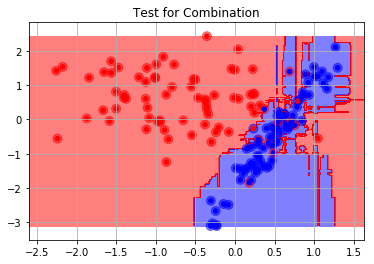

In [53]:
plt.title("Test for Combination")
plt.contourf(xx, yy, Z_comb, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=clfAD.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Регрессия</b></p>

In [54]:
from sklearn.ensemble import AdaBoostRegressor

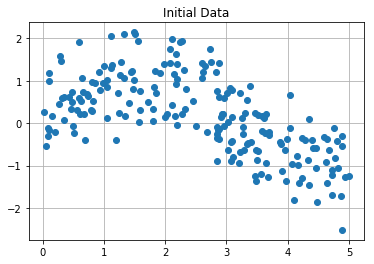

In [56]:
#Исходные данные
n = 200
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.6, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

In [57]:
#Обучение
#regLR = LinearRegression()
regRF = RandomForestRegressor(criterion="mse", max_depth=3, random_state=50)

regAB = AdaBoostRegressor(regRF, n_estimators=50, loss="square")
regAB.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=50,
           verbose=0, warm_start=False),
         learning_rate=1.0, loss='square', n_estimators=50,
         random_state=None)

In [58]:
for i in range(len(regAB.estimators_)):
    print("Test Score using for AdaBoostClassifier[%i]: %f" % (i, regAB.estimators_[i].score(x_test, y_test)))

Test Score using for AdaBoostClassifier[0]: 0.389519
Test Score using for AdaBoostClassifier[1]: 0.337751
Test Score using for AdaBoostClassifier[2]: 0.345478
Test Score using for AdaBoostClassifier[3]: 0.401103
Test Score using for AdaBoostClassifier[4]: 0.367019
Test Score using for AdaBoostClassifier[5]: 0.186079
Test Score using for AdaBoostClassifier[6]: 0.459647
Test Score using for AdaBoostClassifier[7]: 0.445956
Test Score using for AdaBoostClassifier[8]: 0.342294
Test Score using for AdaBoostClassifier[9]: 0.149847
Test Score using for AdaBoostClassifier[10]: 0.351875
Test Score using for AdaBoostClassifier[11]: 0.115037
Test Score using for AdaBoostClassifier[12]: 0.421646
Test Score using for AdaBoostClassifier[13]: 0.203856
Test Score using for AdaBoostClassifier[14]: 0.344856
Test Score using for AdaBoostClassifier[15]: 0.179380
Test Score using for AdaBoostClassifier[16]: 0.336419
Test Score using for AdaBoostClassifier[17]: 0.055152
Test Score using for AdaBoostClassifie

In [59]:
score = regAB.score(x_test, y_test)
print("Test Score using VotingClassRegress = ", score)

Test Score using VotingClassRegress =  0.440987297228


In [60]:
xx = np.arange(0, x.max(), 0.01)[:, np.newaxis]

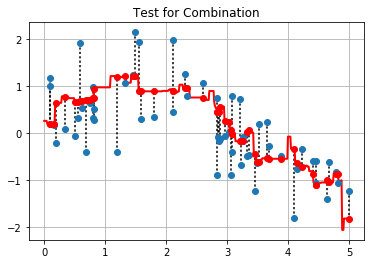

In [61]:
plt.title("Test for Combination")
plt.plot(xx, regAB.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=regAB.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, regAB.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()

<p><b>Bagging Boost</b></p>

<p>Классификация</p>

In [62]:
from sklearn.ensemble import BaggingClassifier

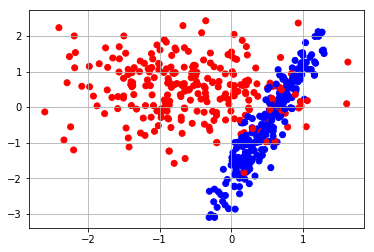

In [63]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.5,
                           random_state=484)

clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [66]:
#clfLR = LogisticRegression(penalty='l2', solver='lbfgs', C=10e-5, random_state=0, fit_intercept=True)
#clfRF = RandomForestClassifier(random_state=0)
clfGNB = GaussianNB()

clfBC = BaggingClassifier(clfGNB, n_estimators=50)
clfBC.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None), bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [67]:
for i in range(len(clfBC.estimators_)):
    print("Test Score using for BaggingClassifier[%i]: %f" % (i, clfBC.estimators_[i].score(x_test, y_test)))

Test Score using for BaggingClassifier[0]: 0.860000
Test Score using for BaggingClassifier[1]: 0.866667
Test Score using for BaggingClassifier[2]: 0.860000
Test Score using for BaggingClassifier[3]: 0.853333
Test Score using for BaggingClassifier[4]: 0.866667
Test Score using for BaggingClassifier[5]: 0.873333
Test Score using for BaggingClassifier[6]: 0.880000
Test Score using for BaggingClassifier[7]: 0.873333
Test Score using for BaggingClassifier[8]: 0.866667
Test Score using for BaggingClassifier[9]: 0.860000
Test Score using for BaggingClassifier[10]: 0.873333
Test Score using for BaggingClassifier[11]: 0.866667
Test Score using for BaggingClassifier[12]: 0.853333
Test Score using for BaggingClassifier[13]: 0.880000
Test Score using for BaggingClassifier[14]: 0.873333
Test Score using for BaggingClassifier[15]: 0.880000
Test Score using for BaggingClassifier[16]: 0.853333
Test Score using for BaggingClassifier[17]: 0.880000
Test Score using for BaggingClassifier[18]: 0.873333
Tes

In [68]:
score_std = clfBC.score(x_test, y_test)
print("Test Score using VotingClassifier = ", score_std)

Test Score using VotingClassifier =  0.88


In [69]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z_comb = clfAD.predict(points).reshape(xx.shape)

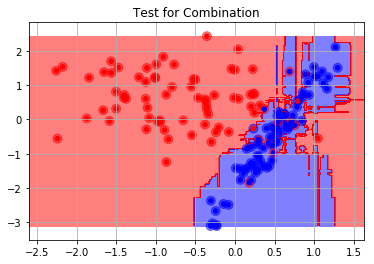

In [70]:
plt.title("Test for Combination")
plt.contourf(xx, yy, Z_comb, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=clfAD.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p>Регрессия</p>

In [71]:
from sklearn.ensemble import BaggingRegressor

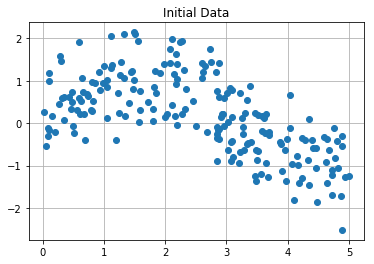

In [72]:
#Исходные данные
n = 200
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.6, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

In [74]:
#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

In [75]:
#Обучение
#regLR = LinearRegression()
regRF = RandomForestRegressor(criterion="mse", max_depth=3, random_state=0)

regBR = BaggingRegressor(regRF, n_estimators=50)
regBR.fit(x_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [76]:
for i in range(len(regBR.estimators_)):
    print("Test Score using for BaggingClassifier[%i]: %f" % (i, regBR.estimators_[i].score(x_test, y_test)))

Test Score using for BaggingClassifier[0]: 0.485260
Test Score using for BaggingClassifier[1]: 0.455916
Test Score using for BaggingClassifier[2]: 0.489885
Test Score using for BaggingClassifier[3]: 0.526800
Test Score using for BaggingClassifier[4]: 0.480137
Test Score using for BaggingClassifier[5]: 0.474176
Test Score using for BaggingClassifier[6]: 0.449394
Test Score using for BaggingClassifier[7]: 0.449760
Test Score using for BaggingClassifier[8]: 0.463594
Test Score using for BaggingClassifier[9]: 0.457763
Test Score using for BaggingClassifier[10]: 0.476194
Test Score using for BaggingClassifier[11]: 0.417482
Test Score using for BaggingClassifier[12]: 0.509864
Test Score using for BaggingClassifier[13]: 0.485646
Test Score using for BaggingClassifier[14]: 0.491541
Test Score using for BaggingClassifier[15]: 0.432863
Test Score using for BaggingClassifier[16]: 0.462976
Test Score using for BaggingClassifier[17]: 0.427644
Test Score using for BaggingClassifier[18]: 0.448716
Tes

In [77]:
score = regBR.score(x_test, y_test)
print("Test Score using VotingClassRegress = ", score)

Test Score using VotingClassRegress =  0.513348657737


In [78]:
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]

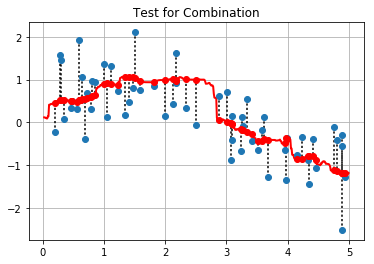

In [79]:
plt.title("Test for Combination")
plt.plot(xx, regBR.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=regBR.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, regBR.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()